# 1. Stock price

## 1.0 Install packages: yfinance, pykalman

In [9]:
# Pip install yfinance, pykalman packages if don't have them
#! pip install yfinance
#! pip install pykalman
import yfinance as yf
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1. Get stock price data from yfinance

In [10]:
data = yf.download("SPY", start="2017-01-01", end="2021-12-31")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,207.534515,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,208.769211,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,208.603333,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,209.349670,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,208.658646,46939700
...,...,...,...,...,...,...
2021-08-23,445.160004,448.230011,443.440002,447.260010,447.260010,54973000
2021-08-24,447.970001,448.540009,447.420013,447.970001,447.970001,38744700
2021-08-25,448.170013,449.459991,447.769989,448.910004,448.910004,40529700


## 1.2. Construct a Kalman filter

In [11]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)
state_means

array([[103.76725769],
       [139.23149351],
       [157.13093465],
       ...,
       [442.75121489],
       [443.08498873],
       [443.76655987]])

In [14]:
data['KF_mean'] = np.array(state_means)
data

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,207.534515,91366500,103.767258
2017-01-04,225.619995,226.750000,225.610001,226.580002,208.769211,78744400,139.231494
2017-01-05,226.270004,226.580002,225.479996,226.399994,208.603333,78379000,157.130935
2017-01-06,226.529999,227.750000,225.899994,227.210007,209.349670,71559900,168.168408
2017-01-09,226.910004,227.070007,226.419998,226.460007,208.658646,46939700,175.507153
...,...,...,...,...,...,...,...
2021-08-23,445.160004,448.230011,443.440002,447.260010,447.260010,54973000,441.487086
2021-08-24,447.970001,448.540009,447.420013,447.970001,447.970001,38744700,442.103773
2021-08-25,448.170013,449.459991,447.769989,448.910004,448.910004,40529700,442.751215


Text(0, 0.5, 'Price')

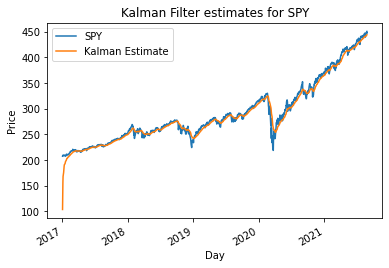

In [13]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for SPY')
plt.legend(['SPY','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')

# 2. A moving objective

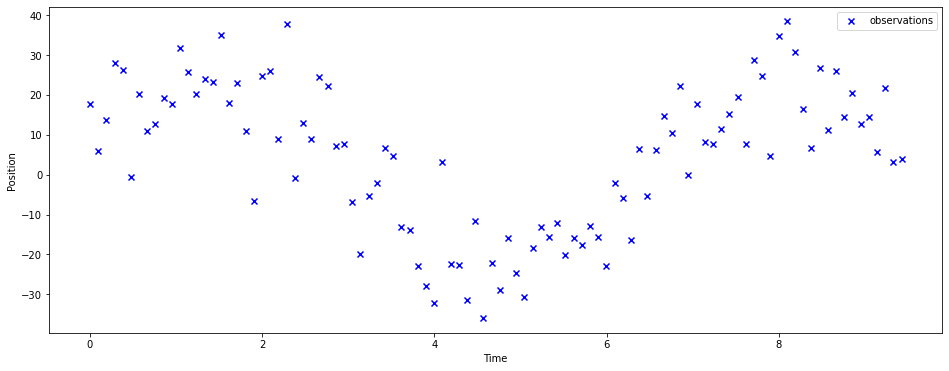

In [19]:
rnd = np.random.RandomState(0)
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
y = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
plt.figure(figsize=(16, 6))
plt.scatter(x,y, marker='x', color='b', label='observations')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

In [17]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(y).smooth(y)[0]

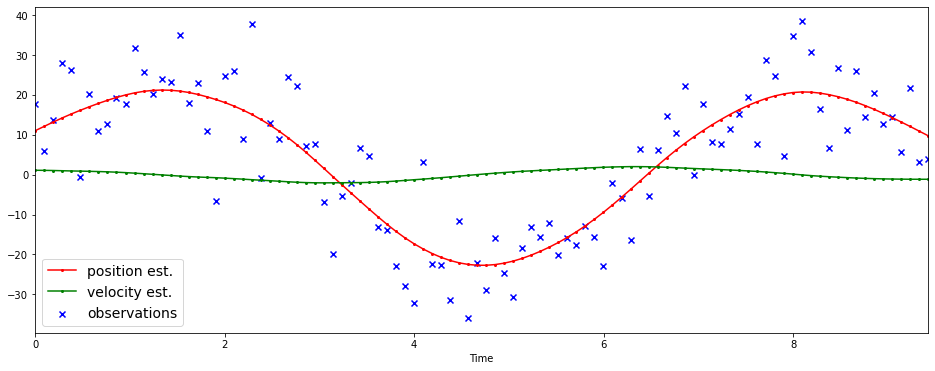

In [18]:
plt.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],markersize=2,
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
plt.legend(loc='lower left',fontsize=14)
plt.xlim(xmin=0, xmax=x.max())
plt.xlabel('Time')
plt.show()

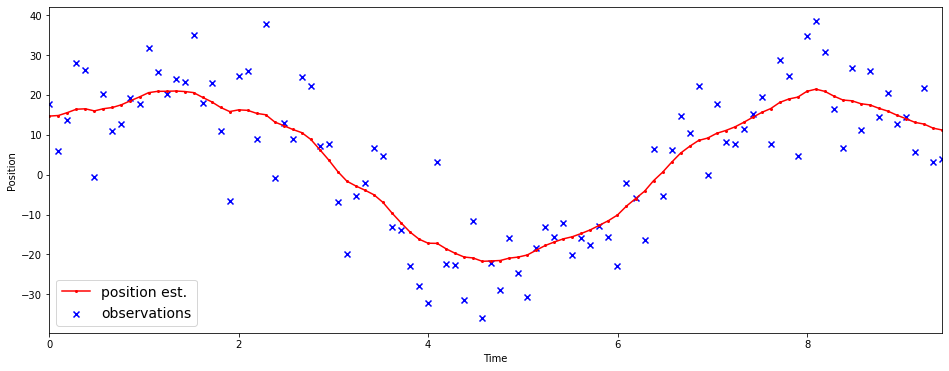

In [20]:
kf = KalmanFilter(transition_matrices=[1],
                  transition_covariance=0.01)
states_pred = kf.em(y).smooth(y)[0]

plt.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred,markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
plt.legend(loc='lower left',fontsize=14)
plt.xlim(xmin=0, xmax=x.max())
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()